In [50]:
import gymnasium as gym
import numpy as np
import math
import random
import matplotlib
import matplotlib.pyplot as plt
from itertools import count
import pandas as pd

import tensorflow as tf
from dqn import DQN, Transition, DataBuffer

env = gym.make("CartPole-v1")

# set up matplotlib
is_ipython = 'inline' in matplotlib.get_backend()
if is_ipython:
    from IPython import display

plt.ion()

In [51]:
state, info = env.reset()
n_observations = len(state)
n_actions = env.action_space.n

In [52]:
#plot cartpole actions against states/other variables
#where does this data come from? 

#run a random agent and see what it does
#use a q-table to choose actions

#use image arrays as input 
#use state variables as input

#generate left or right as output
#the cart is pushed with a fixed force and you can't specify or change it

# x: the horizontal position of the cart (positive means to the right)
# v: the horizontal velocity of the cart (positive means moving to the right)
# θ: the angle between the pole and the vertical position (positive means clock-wise)
# ω: angular velocity of the pole (positive means rotating clock-wise)

#if the pole is leaning to the left, you should move the cart to the left to steady it
#write a function based on the four variables that returns 0 for left and 1 for right

In [53]:
#agent class

class Agent:
    
    
    def __init__(self, states, actions):
        self.q = {}
        self.memory = []
        self.actions = [a for a in range(actions)]
        self.alpha = 0.8
        self.epsilon = 0.9
        self.epsilon_decay = 0.99
        self.gamma = 0.7
    
    def update(self, state, action, reward, new_value):
        current_q = self.q.get(state)[action] 
        if current_q == 0:
            self.q[state][action] = reward
        else:
            self.set_q(state, action, current_q + self.alpha * (new_value - current_q))
            
    def learn(self, state, action, reward, state2, _):
        max_q = max([self.q.get(state2)[a] for a in self.actions])
        self.update(state, action, reward, reward + self.gamma * max_q)
        
    def batch_rows(self, state, state2, action, reward, done):
        self.memory.append([state, state2, action, reward, done])
        
    def act(self, state):
        action = random.choice(self.actions)
        #choose sample policy based on feature relationships
        #action = state*weight + b
        #look at memory dataframe
            
        return action

In [54]:
n_actions = env.action_space.n
state = env.reset()
n_observations = len(state)

agent = Agent(states=n_observations, actions=n_actions)

episodes = 1
total_steps = 0
total_reward = 0

for episode in range(episodes):
    
    state = env.reset()
    reward = 0
    steps = 0
    done = False
    
    while not done:
        action = agent.act(state)
        next_state, reward, done, info, _ = env.step(action)
        agent.batch_rows(state, next_state, action, done)
        state = next_state
        
        steps += 1
        total_reward += reward

    total_steps += steps

In [55]:
df = pd.DataFrame(agent.memory)[1:]
df.rename(columns={0: 'state', 1: 'next_state', 2: 'action', 3: 'done'}, inplace=True)
df2 = pd.DataFrame(df['state'].to_list(), columns=['x','v', 'theta', 'omega'])
df3 = pd.DataFrame(df['next_state'].to_list(), columns=['next_x',
                                                        'next_v', 
                                                        'next_theta', 
                                                        'next_omega'])

In [56]:
dfa = pd.concat([df2, df3, df.reset_index()[['action', 'done']]], axis=1)

In [68]:
dfa['predict_action'] = ((dfa['theta'] > 0) & dfa['v'] > 0).astype(int)
dfa

,x,v,theta,omega,next_x,next_v,next_theta,next_omega,action,done,predict_action
0,0.043721,0.216719,-0.004267,-0.324654,0.048055,0.021658,-0.010760,-0.033319,0,False,0
1,0.048055,0.021658,-0.010760,-0.033319,0.048488,-0.173308,-0.011427,0.255949,0,False,0
2,0.048488,-0.173308,-0.011427,0.255949,0.045022,-0.368265,-0.006308,0.545006,0,False,0
3,0.045022,-0.368265,-0.006308,0.545006,0.037657,-0.563297,0.004593,0.835695,0,False,0
4,0.037657,-0.563297,0.004593,0.835695,0.026391,-0.758482,0.021306,1.129819,0,False,1
5,0.026391,-0.758482,0.021306,1.129819,0.011221,-0.563645,0.043903,0.843894,1,False,1
6,0.011221,-0.563645,0.043903,0.843894,-0.000052,-0.369149,0.060781,0.565334,1,False,1
7,-0.000052,-0.369149,0.060781,0.565334,-0.007435,-0.174930,0.072087,0.292402,1,False,1
8,-0.007435,-0.174930,0.072087,0.292402,-0.010933,-0.371002,0.077935,0.606921,0,False,1
9,-0.010933,-0.371002,0.077935,0.606921,-0.018353,-0.567122,0.090074,0.923099,0,False,1


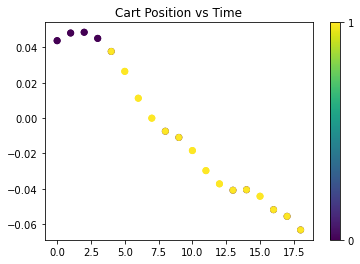

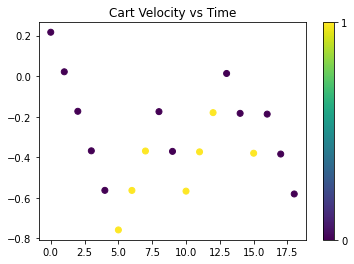

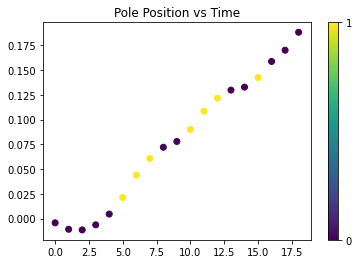

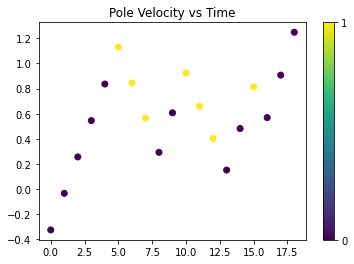

In [69]:
plt.figure()
plt.title('Cart Position vs Time')
plt.scatter(dfa.index, dfa['x'], c=dfa['action'])
plt.scatter(dfa.index, dfa['x'], c=dfa['predict_action'])
plt.colorbar(ticks=[0,1])

plt.figure()
plt.title('Cart Velocity vs Time')
plt.scatter(dfa.index, dfa['v'], c=dfa['action'])
plt.colorbar(ticks=[0,1])

plt.figure()
plt.title('Pole Position vs Time')
plt.scatter(dfa.index, dfa['theta'], c=dfa['action'])
plt.colorbar(ticks=[0,1])

plt.figure()
plt.title('Pole Velocity vs Time')
plt.scatter(dfa.index, dfa['omega'], c=dfa['action'])
plt.colorbar(ticks=[0,1])

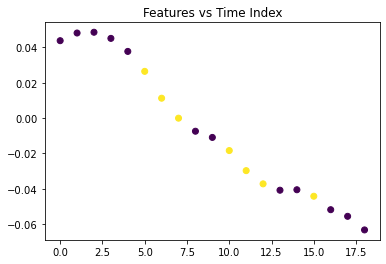

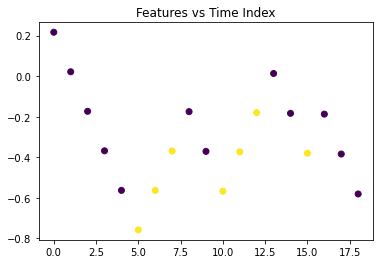

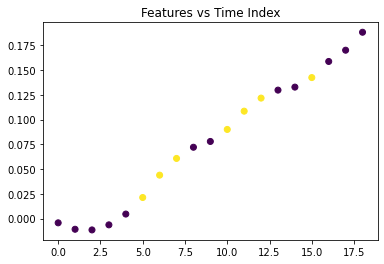

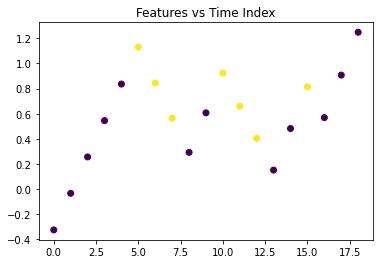

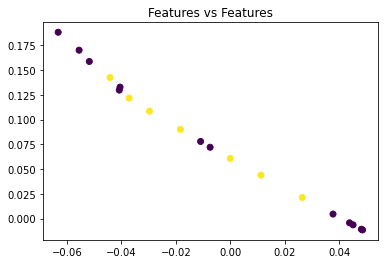

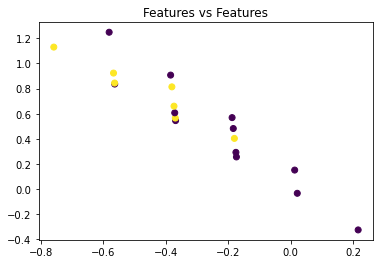

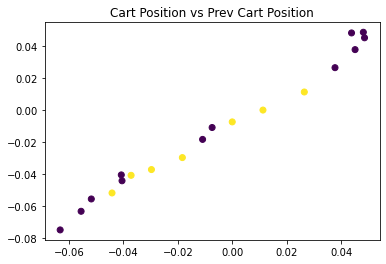

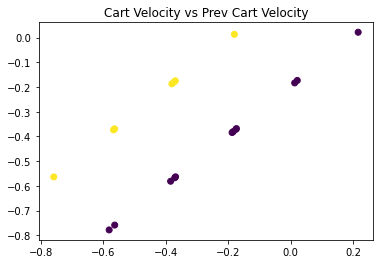

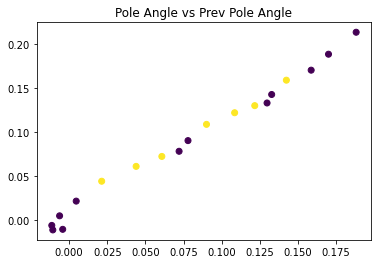

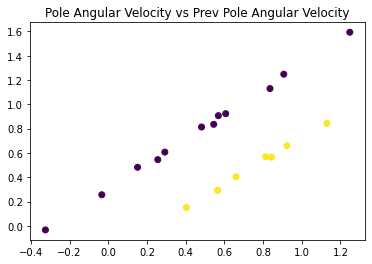

In [59]:
plt.figure()
plt.title('Features vs Time Index')
plt.scatter(dfa.index, dfa['x'], c=dfa['action'])
plt.figure()
plt.title('Features vs Time Index')
plt.scatter(dfa.index, dfa['v'], c=dfa['action'])
plt.figure()
plt.title('Features vs Time Index')
plt.scatter(dfa.index, dfa['theta'], c=dfa['action'])
plt.figure()
plt.title('Features vs Time Index')
plt.scatter(dfa.index, dfa['omega'], c=dfa['action'])

plt.figure()
plt.title('Features vs Features')
plt.scatter(dfa['x'], dfa['theta'], c=dfa['action'])

plt.figure()
plt.title('Features vs Features')
plt.scatter(dfa['v'], dfa['omega'], c=dfa['action'])

plt.figure()
plt.title('Cart Position vs Prev Cart Position')
plt.scatter(dfa['x'], dfa['next_x'], c=dfa['action'])
plt.figure()
plt.title('Cart Velocity vs Prev Cart Velocity')
plt.scatter(dfa['v'], dfa['next_v'], c=dfa['action'])
plt.figure()
plt.title('Pole Angle vs Prev Pole Angle')
plt.scatter(dfa['theta'], dfa['next_theta'], c=dfa['action'])
plt.figure()
plt.title('Pole Angular Velocity vs Prev Pole Angular Velocity')
plt.scatter(dfa['omega'], dfa['next_omega'], c=dfa['action'])

In [ ]:
# find a way to take actions using state variables